In [16]:
import numpy as np
import cv2

# กำหนดขนาดภาพ
width = 640
height = 480

# สร้างเฟรมวิดีโอ
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_video.avi', fourcc, 20.0, (width, height))

# สร้างชุดค่า a และ b
a_values = np.linspace(0.5, 2.0, 20)
b_values = np.linspace(-100, 100, 20)

for a, b in zip(a_values, b_values):
    # Load the grayscale image
    image = cv2.imread("D:/ce 60/3/3d1/IMAGE PROCESSING/lab2/1547811146.jpg", cv2.IMREAD_GRAYSCALE)

    for y in range(height):
        for x in range(width):
            # Calculate the new pixel value using the equation
            g = int(a * x + b)

            # Ensure the pixel value doesn't exceed 255 or go below 0
            g = max(0, min(g, 255))

            # Set the pixel value in the grayscale image
            image[y, x] = g

    # เขียนภาพในเฟรมวิดีโอ
    out.write(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR))

# ปิดเฟรมวิดีโอ
out.release()

print("Video generated successfully.")


Video generated successfully.


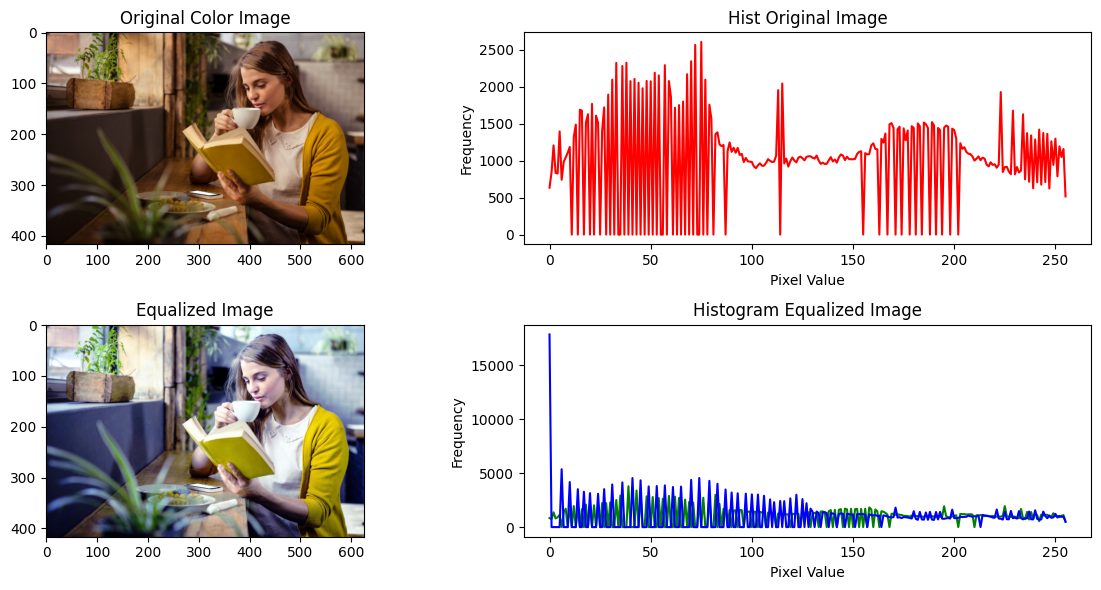

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# อ่านภาพจากไฟล์
image = cv2.imread('D:/ce 60/3/3d1/IMAGE PROCESSING/Reading-1.jpg', cv2.IMREAD_COLOR)

# แยกสีภาพเป็นช่อง R, G, B
b, g, r = cv2.split(image)

# ทำ Histogram Equalization บนแต่ละช่องสี ด้วย cv2.equalizeHist()
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# รวมช่องภาพที่ได้จากการ Histogram Equalization
equalized_image = cv2.merge((b_eq, g_eq, r_eq))

# คำนวณ histogram ของภาพแต่ละสี ด้วย cv2.calcHist()
hist_r = cv2.calcHist([r_eq], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g_eq], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b_eq], [0], None, [256], [0, 256])

# แสดงผลภาพที่ผ่านกระบวนการ Histogram Equalization
#cv2.imshow('Equalized Image', equalized_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# แสดงผล histogram ของภาพแต่ละสี
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')

plt.subplot(2, 2, 2)
plt.plot(hist_r, color='r')
plt.title('Hist Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.plot(hist_g, color='g')
plt.plot(hist_b, color='b')
plt.title('Histogram Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


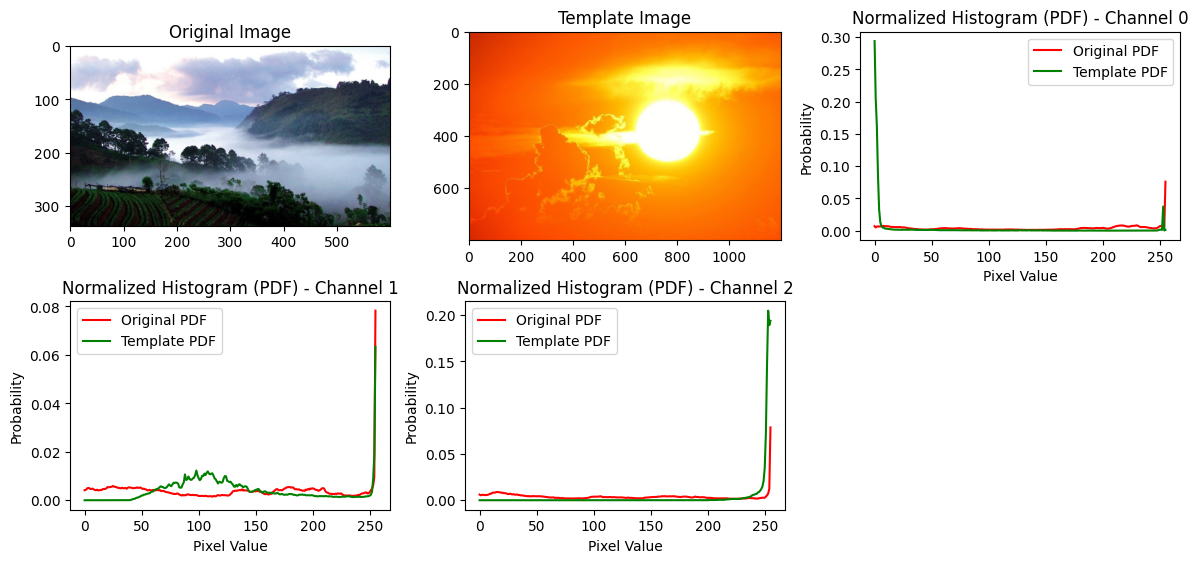

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


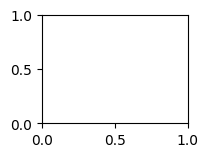

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_normalized_histogram(image):
    histograms = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]
    pdfs = [hist / np.sum(hist) for hist in histograms]
    return pdfs

def calculate_cdf(pdf):
    cdf = np.cumsum(pdf)
    return cdf

def histogram_matching(image, template_cdfs):
    image_cdfs = calculate_normalized_histogram(image)
    matched_channels = [np.interp(cdf, template_cdf, np.arange(256)) for cdf, template_cdf in zip(image_cdfs, template_cdfs)]
    matched_image = cv2.merge(matched_channels)
    return matched_image

# อ่านภาพต้นฉบับและภาพ template
original_image = cv2.imread('D:/ce 60/3/3d1/IMAGE PROCESSING/lab2/doiaungkan.jpg', cv2.IMREAD_COLOR)
template_image = cv2.imread('D:/ce 60/3/3d1/IMAGE PROCESSING/04.jpg', cv2.IMREAD_COLOR)

# คำนวณค่า Normalized Histogram (pdf) และ Cummulative Histogram (cdf) ของภาพต้นฉบับและภาพ template
original_pdfs = calculate_normalized_histogram(original_image)
original_cdfs = [calculate_cdf(pdf) for pdf in original_pdfs]
template_pdfs = calculate_normalized_histogram(template_image)
template_cdfs = [calculate_cdf(pdf) for pdf in template_pdfs]

# ตรวจสอบค่า CDF สุดท้ายของ template
template_cdf_endpoints = [cdf[-1] for cdf in template_cdfs]
target_cdf = 1.0

# กระบวนการ Histogram Matching
matched_image = histogram_matching(original_image, template_cdfs)

# เขียนฟังก์ชัน subplot สำหรับแสดงผลเปรียบเทียบภาพและกราฟ
def plot_comparison(image1, title1, image2, title2, xlabel, ylabel, xlim=None, ylim=None,matched_image=None):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 3, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title(title1)

    plt.subplot(3, 3, 2)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title(title2)


    for i in range(3):
        plt.subplot(3, 3, 3 + i)
        plt.plot(original_pdfs[i], color='r', label='Original PDF')
        plt.plot(template_pdfs[i], color='g', label='Template PDF')
        plt.title(f'Normalized Histogram (PDF) - Channel {i}')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.legend()

    plt.tight_layout()
    plt.show()
    
    plt.subplot(3, 3, 3)
    plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
    plt.title('Matched Image')
    plt.show()

    # แสดงผลรูปภาพผลลัพธ์
    plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
    plt.title('Matched Image')
    plt.show()

# แสดงผลรูปภาพเปรียบเทียบ ภาพต้นฉบับ และภาพ template และกราฟ pdf
plot_comparison(original_image, 'Original Image', template_image,'Template Image', 'Pixel Value', 'Probability',)



# บันทึกรูปภาพผลลัพธ์
cv2.imwrite('matched_image.jpg', matched_image)